In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!tar -xvf /content/drive/My\ Drive/yelp_dataset.tar

business.json
checkin.json
review.json
tip.json
user.json
photo.json
Dataset_Challenge_Dataset_Agreement.pdf
Yelp_Dataset_Challenge_Round_13.pdf


In [0]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
business = pd.read_json('business.json',lines=True)

In [5]:
business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."


In [0]:
business = business[['business_id','postal_code','stars','review_count','is_open','categories']]

In [0]:
business = business[~business['categories'].isna()]

In [0]:
business = business[business['categories'].str.contains('Restaurants')]

In [9]:
business.head(2)

,business_id,postal_code,stars,review_count,is_open,categories
1,QXAEGFB4oINsVuTFxEYKFQ,L5R 3E7,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,28210,4.0,170,1,"Sushi Bars, Restaurants, Japanese"


In [0]:
user = pd.read_json('user.json',lines=True)

In [11]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,4.03,2,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,3.63,1,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,3.71,0,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,4.85,1,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,4.08,28,1,0,0,1,16,57,80,80,25,5


In [0]:
user = user[['user_id','review_count','elite','fans']]

In [0]:
review = pd.read_json('review.json',lines=True,chunksize=1000000)

In [0]:
review1 = pd.DataFrame()

In [0]:
for record in review:
    review1 = review1.append(pd.DataFrame(record))

In [0]:
review1 = review1[['review_id','user_id','business_id','stars']]

In [0]:
user_review = pd.merge(review1,user,how='left',on='user_id')

In [18]:
user_review.head()

,review_id,user_id,business_id,stars,review_count,elite,fans
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,10,,0
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,68,2009,3
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,10,,1
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,4,,0
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,2,,0


In [0]:
user_review['elite_user'] = np.where(user_review['elite'] != '',1,0)

In [0]:
user_review = user_review.drop(['review_id','elite'],axis=1)

In [0]:
user_review = user_review.groupby(['business_id','elite_user']).agg({'user_id':'count','stars':'mean','review_count':'sum','fans':'sum'})

In [0]:
user_review = user_review.rename(columns={'user_id':'reviews'})

In [0]:
user_review = user_review.reset_index()

In [24]:
user_review.head()

,business_id,elite_user,reviews,stars,review_count,fans
0,--1UhMGODdWsrMastO9DZw,0,21,4.000000,446,9
1,--1UhMGODdWsrMastO9DZw,1,5,4.400000,1021,38
2,--6MefnULPED_I942VcFNA,0,22,2.636364,1618,48
3,--6MefnULPED_I942VcFNA,1,24,3.666667,12567,1968
4,--7zmmkVg-IMGaXbuVd0SQ,0,33,3.909091,592,17


In [0]:
user_review = pd.pivot_table(user_review,values = ['reviews','stars','review_count','fans'],index='business_id',columns='elite_user')

In [26]:
user_review.head()

fans         review_count  ... reviews     stars          
elite_user                 0       1            0  ...       1         0         1
business_id                                        ...                            
--1UhMGODdWsrMastO9DZw   9.0    38.0        446.0  ...     5.0  4.000000  4.400000
--6MefnULPED_I942VcFNA  48.0  1968.0       1618.0  ...    24.0  2.636364  3.666667
--7zmmkVg-IMGaXbuVd0SQ  17.0  1150.0        592.0  ...    26.0  3.909091  3.884615
--8LPVSo5i0Oo61X01sV9A   2.0     NaN         30.0  ...     NaN  3.500000       NaN
--9QQLMTbFzLJ_oT-ON3Xw   8.0     5.0        328.0  ...     1.0  3.250000  4.000000

[5 rows x 8 columns]

In [0]:
user_review = user_review.reset_index()

In [0]:
user_review.columns = ['business_id','Non_elite_fans','elite_fans','Non_elite_total_reviews','elite_total_reviews','Non_elite_rest_reviews','elite_rest_reviews','Non_elite_rating','elite_rating']

In [29]:
user_review.head()

,business_id,Non_elite_fans,elite_fans,Non_elite_total_reviews,elite_total_reviews,Non_elite_rest_reviews,elite_rest_reviews,Non_elite_rating,elite_rating
0,--1UhMGODdWsrMastO9DZw,9.0,38.0,446.0,1021.0,21.0,5.0,4.000000,4.400000
1,--6MefnULPED_I942VcFNA,48.0,1968.0,1618.0,12567.0,22.0,24.0,2.636364,3.666667
2,--7zmmkVg-IMGaXbuVd0SQ,17.0,1150.0,592.0,11518.0,33.0,26.0,3.909091,3.884615
3,--8LPVSo5i0Oo61X01sV9A,2.0,NaN,30.0,NaN,4.0,NaN,3.500000,NaN
4,--9QQLMTbFzLJ_oT-ON3Xw,8.0,5.0,328.0,139.0,12.0,1.0,3.250000,4.000000


In [0]:
checkin = pd.read_json('checkin.json',lines=True)

In [31]:
checkin.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [0]:
checkin['date'] = checkin['date'].str.split(',').tolist()

In [0]:
checkin = checkin.explode('date')

In [0]:
checkin['date'] = pd.to_datetime(checkin['date'])
checkin['year'] = pd.DatetimeIndex(checkin['date']).year

In [35]:
checkin.head()

,business_id,date,year
0,--1UhMGODdWsrMastO9DZw,2016-04-26 19:49:16,2016
0,--1UhMGODdWsrMastO9DZw,2016-08-30 18:36:57,2016
0,--1UhMGODdWsrMastO9DZw,2016-10-15 02:45:18,2016
0,--1UhMGODdWsrMastO9DZw,2016-11-18 01:54:50,2016
0,--1UhMGODdWsrMastO9DZw,2017-04-20 18:39:06,2017


In [0]:
checkin = checkin.groupby(['business_id','year']).count().reset_index()

In [0]:
checkin = checkin.groupby('business_id').mean().reset_index()

In [38]:
checkin.head()

,business_id,year,date
0,--1UhMGODdWsrMastO9DZw,2016.5,3.000000
1,--6MefnULPED_I942VcFNA,2014.5,20.875000
2,--7zmmkVg-IMGaXbuVd0SQ,2016.0,36.000000
3,--8LPVSo5i0Oo61X01sV9A,2016.0,1.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,2014.0,4.111111


In [0]:
checkin = checkin.rename(columns={'date':'avg_checkins_peryear'})

In [0]:
checkin = checkin.drop('year',axis=1)

In [41]:
checkin.head()

,business_id,avg_checkins_peryear
0,--1UhMGODdWsrMastO9DZw,3.000000
1,--6MefnULPED_I942VcFNA,20.875000
2,--7zmmkVg-IMGaXbuVd0SQ,36.000000
3,--8LPVSo5i0Oo61X01sV9A,1.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,4.111111


In [0]:
restaurants_postal = business[business['postal_code'].notnull()]

In [43]:
restaurants_postal.head()

,business_id,postal_code,stars,review_count,is_open,categories
1,QXAEGFB4oINsVuTFxEYKFQ,L5R 3E7,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,28210,4.0,170,1,"Sushi Bars, Restaurants, Japanese"
11,1Dfx3zM-rW4n-31KeC8sJg,85016,3.0,18,1,"Restaurants, Breakfast & Brunch, Mexican, Taco..."
13,fweCYi8FmbJXHCqLnwuk8w,44060,4.0,16,1,"Italian, Restaurants, Pizza, Chicken Wings"
17,PZ-LZzSlhSe9utkQYU8pFg,89119,4.0,40,0,"Restaurants, Italian"


In [0]:
restaurants_postal = restaurants_postal.groupby(['postal_code'])['business_id'].count()

In [0]:
restaurants_postal = restaurants_postal.reset_index()

In [0]:
restaurants_postal = restaurants_postal.rename(columns={'business_id':'total_restaurants'})

In [47]:
restaurants_postal.head()

,postal_code,total_restaurants
0,,102
1,05440,1
2,12919,5
3,12958,1
4,12979,6


In [0]:
photo = pd.read_json('photo.json',lines=True)

In [0]:
photo = photo.groupby(['business_id','label'])['photo_id'].count()

In [0]:
photo = photo.reset_index()

In [51]:
photo.head()

,business_id,label,photo_id
0,--6MefnULPED_I942VcFNA,food,3
1,--9e1ONYQuAa-CB_Rrw7Tw,drink,5
2,--9e1ONYQuAa-CB_Rrw7Tw,food,59
3,--9e1ONYQuAa-CB_Rrw7Tw,inside,7
4,--9e1ONYQuAa-CB_Rrw7Tw,menu,1


In [0]:
photo = photo.pivot(index='business_id',columns='label',values='photo_id')

In [53]:
photo.head()

label,drink,food,inside,menu,outside
business_id,,,,,
--6MefnULPED_I942VcFNA,NaN,3.0,NaN,NaN,NaN
--9e1ONYQuAa-CB_Rrw7Tw,5.0,59.0,7.0,1.0,2.0
--DaPTJW3-tB1vP-PfdTEg,NaN,NaN,NaN,NaN,1.0
--FBCX-N37CMYDfs790Bnw,NaN,1.0,NaN,NaN,NaN
--KCl2FvVQpvjzmZSPyviA,NaN,2.0,NaN,NaN,NaN


In [0]:
photo = photo.replace(np.nan,0)

In [0]:
photo = photo.reset_index()

In [56]:
photo.head()

label,business_id,drink,food,inside,menu,outside
0,--6MefnULPED_I942VcFNA,0.0,3.0,0.0,0.0,0.0
1,--9e1ONYQuAa-CB_Rrw7Tw,5.0,59.0,7.0,1.0,2.0
2,--DaPTJW3-tB1vP-PfdTEg,0.0,0.0,0.0,0.0,1.0
3,--FBCX-N37CMYDfs790Bnw,0.0,1.0,0.0,0.0,0.0
4,--KCl2FvVQpvjzmZSPyviA,0.0,2.0,0.0,0.0,0.0


Need to merge all the datasets together with the main business file

1) user_review

2) restaurants_postal

3) checkin

4) photo

In [0]:
final = pd.merge(business, restaurants_postal, how='left',on='postal_code')

In [0]:
final = pd.merge(final,user_review,how='left',on='business_id')

In [0]:
final = pd.merge(final,checkin,how='left',on='business_id')

In [0]:
final = pd.merge(final,photo,how='left',on='business_id')

In [61]:
final.head()

,business_id,postal_code,stars,review_count,is_open,categories,total_restaurants,Non_elite_fans,elite_fans,Non_elite_total_reviews,elite_total_reviews,Non_elite_rest_reviews,elite_rest_reviews,Non_elite_rating,elite_rating,avg_checkins_peryear,drink,food,inside,menu,outside
0,QXAEGFB4oINsVuTFxEYKFQ,L5R 3E7,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",6,37.0,1654.0,2287.0,16991.0,72.0,62.0,2.444444,3.080645,50.555556,0.0,1.0,1.0,0.0,1.0
1,gnKjwL_1w79qoiV3IC_xQQ,28210,4.0,170,1,"Sushi Bars, Restaurants, Japanese",88,119.0,1072.0,4428.0,12168.0,135.0,43.0,4.140741,3.860465,80.111111,0.0,6.0,2.0,0.0,0.0
2,1Dfx3zM-rW4n-31KeC8sJg,85016,3.0,18,1,"Restaurants, Breakfast & Brunch, Mexican, Taco...",294,78.0,167.0,1152.0,920.0,15.0,4.0,2.600000,4.000000,10.000000,NaN,NaN,NaN,NaN,NaN
3,fweCYi8FmbJXHCqLnwuk8w,44060,4.0,16,1,"Italian, Restaurants, Pizza, Chicken Wings",199,6.0,232.0,255.0,883.0,15.0,3.0,4.533333,3.333333,1.666667,NaN,NaN,NaN,NaN,NaN
4,PZ-LZzSlhSe9utkQYU8pFg,89119,4.0,40,0,"Restaurants, Italian",470,165.0,301.0,3436.0,4646.0,31.0,10.0,3.967742,4.500000,8.500000,0.0,0.0,1.0,0.0,1.0


In [0]:
final2 = final.drop(['business_id','postal_code','categories'],axis=1)

In [0]:
values = {'drink': 0, 'food': 0, 'inside': 0, 'menu': 0,'outside': 0,'Non_elite_fans':0,'elite_fans':0,'Non_elite_total_reviews':0,'elite_total_reviews':0, 'Non_elite_rest_reviews':0, 'elite_rest_reviews':0,'avg_checkins_peryear':0}
final2 = final2.fillna(value=values)

In [64]:
final2.describe()

,stars,review_count,is_open,total_restaurants,Non_elite_fans,elite_fans,Non_elite_total_reviews,elite_total_reviews,Non_elite_rest_reviews,elite_rest_reviews,Non_elite_rating,elite_rating,avg_checkins_peryear,drink,food,inside,menu,outside
count,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,5.937100e+04,59371.000000,59371.000000,58947.000000,54463.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000
mean,3.441790,68.456452,0.711408,106.555979,80.445807,791.995250,2110.114467,6.793487e+03,52.515824,18.254148,3.404865,3.565957,32.346721,0.287379,1.927658,0.825133,0.050008,0.182985
std,0.803304,176.636132,0.453112,157.568255,276.481661,2894.959626,6620.529497,2.260784e+04,133.974232,52.624538,0.908476,0.770053,108.533152,1.246594,6.514746,3.541126,0.374002,0.820099
min,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.000000,0.000000,5.000000,3.000000,30.000000,134.000000,4.670000e+02,5.000000,2.000000,2.846154,3.087596,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,21.000000,1.000000,55.000000,14.000000,151.000000,510.000000,1.805000e+03,15.000000,5.000000,3.500000,3.666667,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,62.000000,1.000000,136.000000,56.000000,675.000000,1723.500000,6.228500e+03,47.000000,16.000000,4.050000,4.000000,24.250000,0.000000,2.000000,1.000000,0.000000,0.000000
max,5.000000,8348.000000,1.000000,965.000000,13130.000000,140212.000000,341940.000000,1.118966e+06,6005.000000,2707.000000,5.000000,5.000000,7655.400000,55.000000,590.000000,327.000000,32.000000,61.000000


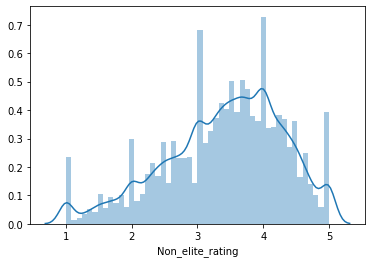

In [65]:
sns.distplot(final2['Non_elite_rating'])

In [0]:
final2.loc[final2['Non_elite_rating'].isna(),'Non_elite_rating'] = final2['Non_elite_rating'].mean()

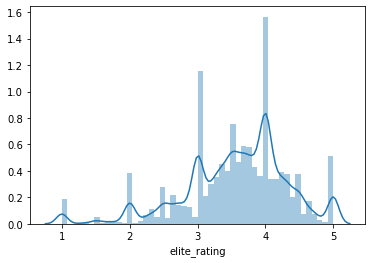

In [67]:
sns.distplot(final2['elite_rating'])

In [0]:
final2.loc[final2['elite_rating'].isna(),'elite_rating']= final2['elite_rating'].mean()

In [69]:
final2.describe()

,stars,review_count,is_open,total_restaurants,Non_elite_fans,elite_fans,Non_elite_total_reviews,elite_total_reviews,Non_elite_rest_reviews,elite_rest_reviews,Non_elite_rating,elite_rating,avg_checkins_peryear,drink,food,inside,menu,outside
count,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,5.937100e+04,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000,59371.000000
mean,3.441790,68.456452,0.711408,106.555979,80.445807,791.995250,2110.114467,6.793487e+03,52.515824,18.254148,3.404865,3.565957,32.346721,0.287379,1.927658,0.825133,0.050008,0.182985
std,0.803304,176.636132,0.453112,157.568255,276.481661,2894.959626,6620.529497,2.260784e+04,133.974232,52.624538,0.905226,0.737537,108.533152,1.246594,6.514746,3.541126,0.374002,0.820099
min,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.000000,0.000000,5.000000,3.000000,30.000000,134.000000,4.670000e+02,5.000000,2.000000,2.857143,3.181818,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,21.000000,1.000000,55.000000,14.000000,151.000000,510.000000,1.805000e+03,15.000000,5.000000,3.500000,3.578947,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,62.000000,1.000000,136.000000,56.000000,675.000000,1723.500000,6.228500e+03,47.000000,16.000000,4.044346,4.000000,24.250000,0.000000,2.000000,1.000000,0.000000,0.000000
max,5.000000,8348.000000,1.000000,965.000000,13130.000000,140212.000000,341940.000000,1.118966e+06,6005.000000,2707.000000,5.000000,5.000000,7655.400000,55.000000,590.000000,327.000000,32.000000,61.000000


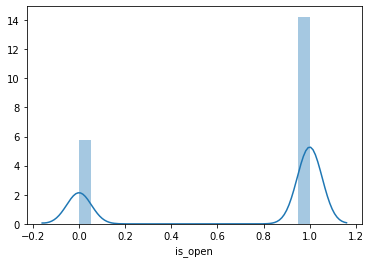

In [70]:
sns.distplot(final2['is_open'])

In [0]:
Y = final2['is_open']
X = final2.drop('is_open',axis=1)

In [0]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score,auc
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score,classification_report

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

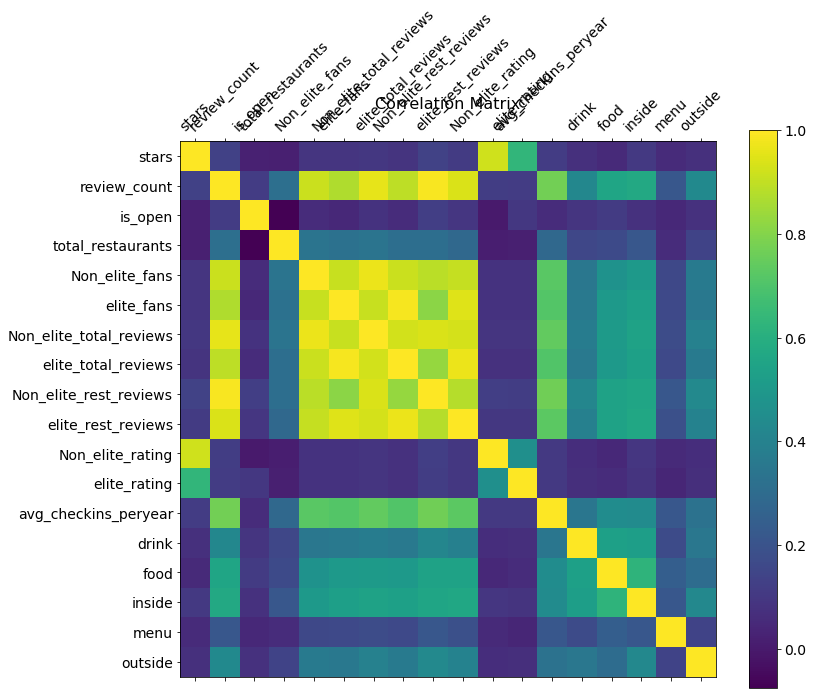

In [74]:
f = plt.figure(figsize=(12, 10))
plt.matshow(final2.corr(), fignum=f.number)
plt.xticks(range(final2.shape[1]), final2.columns, fontsize=14, rotation=45)
plt.yticks(range(final2.shape[1]), final2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
# Nested Cv for model selection

import numpy as np
from sklearn import neighbors
from sklearn import linear_model

param_grid_k = [{'n_neighbors': range(1,21),'weights': ["uniform", "distance"]}]
param_grid_l = [{'C': range(1,20),'penalty': ['l1', 'l2']}]


knn_clf = neighbors.KNeighborsClassifier()
Logit_clf = linear_model.LogisticRegression()

# knn
clf = GridSearchCV(estimator=knn_clf, param_grid=param_grid_k, cv=3, n_jobs=-1,scoring='accuracy')
clf.fit(X_train_scaled, Y_train)
print('KNN best parameters: 'clf.best_params_)
print('KNN best score: ', clf.best_score_)
    
# logit
clf = GridSearchCV(estimator=Logit_clf, param_grid=param_grid_l, cv=3,n_jobs=-1,scoring="accuracy")
clf.fit(X_train, Y_train)
print('Logistic best parameters: ',clf.best_params_)
print('Logistic best score: ',clf.best_score_)

{'n_neighbors': 19, 'weights': 'distance'}
0.723260912783063
{'C': 7, 'penalty': 'l2'}
0.7231977327253285


In [0]:
# Nested Cv for model selection
from sklearn.tree import DecisionTreeClassifier

param_grid_t = [{'max_depth': range(1,20), 'min_samples_split': range(2,20)}]

tree_clf = DecisionTreeClassifier()

    # tree
clf = GridSearchCV(estimator=tree_clf, param_grid=param_grid_t,n_jobs = -1, cv=5,scoring="accuracy")
clf.fit(X_train, Y_train)
print('Decision Tree best parameters: ', clf.best_params_)
print('Decision Tree best score: ',clf.best_score_)

{'max_depth': 7, 'min_samples_split': 17}
0.7339566735556652


In [0]:
from sklearn import svm

param_grid_sr = [{'kernel': ['rbf'], 'gamma': [1,1e-3,1e-4,1e-5],'C': [1, 10, 100, 1000]}]
param_grid_sp = [{'kernel': ['poly'], 'degree': [1,2,3],'C': [1, 10, 100, 1000]}]
param_grid_ln = [{'kernel': ['linear'],'C':[1,10,100,1000]}]


svm_clf = svm.SVC()


    # svm rbf
clf = GridSearchCV(estimator=svm_clf, param_grid=param_grid_sr, cv=5,n_jobs=-1,scoring='accuracy')
clf.fit(X_train_scaled, Y_train)
print('SVM RBF best parameters: ',clf.best_params_)
print('SVM RBF best score: ',clf.best_score_)


    # svm poly
clf = GridSearchCV(estimator=svm_clf, param_grid=param_grid_sp, cv=5,n_jobs=-1,scoring='accuracy')
clf.fit(X_train_scaled, Y_train)
print('SVM poly best parameters: ',clf.best_params_)
print('SVM poly best score: ',clf.best_score_)
    
    # linearSVC
clf = GridSearchCV(estimator=svm_clf, param_grid=param_grid_ln, cv=5,n_jobs=-1,scoring='accuracy')
clf.fit(X_train_scaled, Y_train)
print('SVM linear best parameters: ',clf.best_params_)
print('SVM linear best score: ',clf.best_score_)

In [0]:
from sklearn import ensemble

param_grid_RF = [{'n_estimators': [250,500,750], 'max_depth': range(1,7), 'min_samples_split': range(2,7)}]

enm_RF = ensemble.RandomForestClassifier()

    # Gradient Boosting
clf = GridSearchCV(estimator=enm_RF, param_grid=param_grid_RF, cv=5, n_jobs=-1,scoring='accuracy')
clf.fit(X_train, Y_train)
print('Random Forrest best parameters: ',clf.best_params_)
print('Random Forrest best score: ',clf.best_score_)

Random Forrest best parameters:  {'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 750}
Random Forrest best score:  0.7341461051301799


In [0]:
RF = ensemble.RandomForestClassifier(max_depth = 6,min_samples_split=4,n_estimators=750)
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
X_train.columns

Index(['stars', 'review_count', 'total_restaurants', 'Non_elite_fans',
       'elite_fans', 'Non_elite_total_reviews', 'elite_total_reviews',
       'Non_elite_rest_reviews', 'elite_rest_reviews', 'Non_elite_rating',
       'elite_rating', 'avg_checkins_peryear', 'drink', 'food', 'inside',
       'menu', 'outside'],
      dtype='object')

In [0]:
RF.feature_importances_

array([0.00911819, 0.11737339, 0.13470554, 0.06969164, 0.05316345,
       0.0257144 , 0.02721625, 0.16425389, 0.04283664, 0.02300877,
       0.03496509, 0.06942924, 0.02094467, 0.1789917 , 0.02305764,
       0.00066462, 0.0048649 ])

In [0]:
sns.barplot(x=X_train.columns,y=RF.feature_importances_)

In [0]:
feature_importance = zip(X_train.columns,RF.feature_importances_)

In [0]:
feature_importance = list(feature_importance)

In [0]:
feature_importance = sorted(feature_importance, key = lambda x: x[1])

In [0]:
feature_importance

[('menu', 0.0006646184271291933),
 ('outside', 0.004864902573292504),
 ('stars', 0.009118189281705645),
 ('drink', 0.02094466688123134),
 ('Non_elite_rating', 0.023008773390246817),
 ('inside', 0.02305763780688431),
 ('Non_elite_total_reviews', 0.025714396147849764),
 ('elite_total_reviews', 0.02721625246739476),
 ('elite_rating', 0.0349650857436977),
 ('elite_rest_reviews', 0.042836635531792094),
 ('elite_fans', 0.053163446816678214),
 ('avg_checkins_peryear', 0.06942923540334894),
 ('Non_elite_fans', 0.06969163664933693),
 ('review_count', 0.11737339115125453),
 ('total_restaurants', 0.13470554188354433),
 ('Non_elite_rest_reviews', 0.1642538851596887),
 ('food', 0.17899170468492423)]

In [0]:
from sklearn import ensemble

param_grid_GB = [{'n_estimators': [500,750,1000], 'max_depth': range(1,7), 'min_samples_split': range(2,7),
          'learning_rate': [0.01,0.1,0.5]}]

enm_GB = ensemble.GradientBoostingClassifier()

    # Gradient Boosting
clf = GridSearchCV(estimator=enm_GB, param_grid=param_grid_GB, cv=5, n_jobs=-1,scoring='accuracy')
clf.fit(X_train, Y_train)
print('Gradient Boosting best parameters: ',clf.best_params_)
print('Gradient Boosting best score: ',clf.best_score_)

Gradient Boosting best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 500}
Gradient Boosting best score:  0.7664435236950149


In [0]:
from xgboost import XGBClassifier
param_grid_XGB = {'n_estimators':[750,1000],'learning_rate':[0.001,0.01,0.1],'max_depth':[1,2,3,4,5,6]}

xgb2 = XGBClassifier(objective='binary:logistic',random_state=42)


    # XGBoost
clf = GridSearchCV(estimator=xgb2, param_grid=param_grid_XGB, cv=5, n_jobs=-1,scoring='accuracy')
clf.fit(X_train, Y_train)
print('XGBoost best parameters: ',clf.best_params_)
print('XGBoost best score: ',clf.best_score_)

XGBoost best parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 750}
XGBoost best score:  0.7662750029088935


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier

# Initializing models

clf1 = DecisionTreeClassifier()
clf2 = GradientBoostingClassifier(random_state=42)
clf3 = XGBClassifier(objective='binary:logistic',random_state=42)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3], 
                          meta_classifier=lr)

params = {'decisiontreeclassifier__max_depth': [5, 10],
          'decisiontreeclassifier__min_samples_split': [10, 20],
          'gradientboostingclassifier__n_estimators': [500, 750],
          'gradientboostingclassifier__max_depth': [1, 5],
          'gradientboostingclassifier__min_samples_split': [1, 5],
          'gradientboostingclassifier__learning_rate': [0.1,0.2],
          'xgbclassifier__n_estimators': [500,750],
          'xgbclassifier__learning_rate': [0.1,0.2],
          'xgbclassifier__max_depth': [1,5],
          'meta-logisticregression__C': [0.1, 1.0, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=3,
                    refit=True)
grid.fit(X_train, Y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)